# <font color=darkcyan> Multivariate linear regression - Kernel regression </font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors 
from sklearn.metrics import mean_squared_error

A function $k:\mathbb{R}^d\times\mathbb{R}^d:\to \mathbb{R}$ is said to be a positive semi-definite kernel if and only if it is symmetric and if for all $n\geqslant 1$, $(x_1,\ldots,x_n)\in(\mathbb{R}^d)^n$ and all $(a_1,\ldots,a_n)\in\mathbb{R}^n$,
$$
\sum_{1\leqslant i,j\leqslant n}a_ia_jk(x_i,x_j) \geqslant 0\,.
$$

The following functions, defined on $\mathbb{R}^d\times\mathbb{R}^d$, are positive semi-definite kernels:

$$
k:(x,y)\mapsto x^Ty \quad\mathrm{and}\quad k:(x,y)\mapsto \mathrm{exp}\left(-\|x-y\|^2/(2\sigma^2\right)\,,\; \sigma>0\,.
$$


Let $\mathcal{F}$ be a Hilbert space of functions $f:\mathbb{R}^d\to\mathbb{R}$. A symmetric function $k:\mathbb{R}^d\times\mathbb{R}^d:\to \mathbb{R}$ is said to be a reproducing kernel of $\mathcal{F}$ if and only if:

1. for all $x\in\mathbb{R}^d$, $k(x,\cdot)\in\mathcal{F}$ ; 

2. for all $x\in\mathbb{R}^d$ and all $f\in\mathcal{F}$, $\langle f; k(x,\cdot)\rangle_\mathcal{F} = f(x)$ . 

The space $\mathcal{F}$ is said to be a reproducing kernel Hilbert space with kernel $k$.



Let $k:\mathbb{R}^d\times\mathbb{R}^d:\to \mathbb{R}$ be a positive definite kernel and $\mathcal{F}$ the RKHS with kernel $k$. Then, 

$$
\widehat f^n_{\mathcal{F}} \in \underset{f\in\mathcal{F}}{\mathrm{min}}\;\frac{1}{n}\sum_{i=1}^n (Y_i - f(X_i))^2 + \lambda\|f\|_\mathcal{F}^2\,,
$$

where $\|f\|^2_\mathcal{F} = \langle f\,;\, f\rangle_\mathcal{F}$, is given by $\widehat f^n_{\mathcal{F}} : x \mapsto \sum_{i=1}^n \widehat \alpha_i k(X_i,x)$, where

$$
\widehat\alpha \in \underset{\alpha \in (\mathbb{R}^d)^n}{\mathrm{argmin}}\;\left\{\frac{1}{n}\|Y - K\alpha\|^2_2 + \lambda \sum_{1\leqslant i,j \leqslant n}\alpha_i \alpha_j k(X_i,X_j) = \frac{1}{n}\|Y - K\alpha\|^2_2 + \lambda \alpha^TK\alpha\right\}\,,
$$

where for all $1\leqslant i,j\leqslant n$, $K_{i,j} = k(X_i,X_j)$.

In practice, once the matrix $K$ is built, kernel ridge regression boils down to solving this optimization problem to obtain $\widehat \alpha$. Then, the estimated function $\widehat f^n_{\mathcal{F}}$ is a mixture of kernels evaluated at each data points with weights given by $\alpha$.

It is enough to follow the exact same steps as in the standard linear setting
$$
\nabla \left(\frac{1}{n}\|Y - K\alpha\|^2_2 + \lambda \alpha^TK\alpha\right) = \frac{2}{n}K^TK\alpha - \frac{2}{n}K^TY +  2\lambda K\alpha = 2\left\{\left(\frac{1}{n}K^TK + \lambda K\right)\alpha - \frac{1}{n}K^TY\right\}\,.
$$

Therefore, using that $K$ is symmetric,

$$
\widehat \alpha = \left(K^TK + \lambda n I_n\right)^{-1}Y\,.
$$

#### Import data

In [2]:
import pandas as pd

In [3]:
# In this section, multivariate linear regression is used to predic the Brazilian inflation based on
# many observed variables, see https://github.com/gabrielrvsc/HDeconometrics/
df = pd.read_csv('BRinf.txt')
df.head()

,Unnamed: 0,Brazil CPI IPCA MoM,FGV Brazil General Prices IGP-,FGV Brazil General Prices IGP-.1,FGV Brazil General Prices IGP-.2,FGV Brazil General Prices IGP-.3,Brazil CPI IPCA Median Market,Brazil Total Electricity Consu,Brazil Industrial Electricity,BofA Merrill Lynch Economic Co,...,X5t.12,X5t.13,fmed2,fmean,fmean2,fdp,lfmed2,lfmean,lfmean2,lfdp
0,2003-01-31,2.25,2.33,2.17,5.816,2.29,11.56,25422.0,-359,-1.47,...,0.80,0.68,4.0000,1.96,3.8416,0.18,1.3225,1.15,1.3225,0.24
1,2003-02-28,1.57,2.28,1.59,4.351,2.42,10.95,25163.0,-303,-1.21,...,0.68,0.48,2.5600,1.60,2.5600,0.26,0.7569,0.91,0.8281,0.27
2,2003-03-31,1.23,1.53,1.66,4.593,1.58,9.58,24960.0,115,-0.35,...,0.55,0.50,0.8836,0.93,0.8649,0.13,0.4900,0.73,0.5329,0.17
3,2003-04-30,0.97,0.92,0.41,1.173,1.24,8.88,25284.0,93,-0.15,...,0.45,0.78,1.0000,0.97,0.9409,0.14,0.2500,0.52,0.2704,0.18
4,2003-05-31,0.61,-0.26,-0.67,-1.860,0.02,8.22,24785.0,285,-0.47,...,0.60,0.43,0.2500,0.50,0.2500,0.10,0.3025,0.55,0.3025,0.15


In [4]:
# number of observations, number of variables
df.shape

(156, 93)

In [5]:
X = df.iloc[:,2:]
Y = df.iloc[:,1] 

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [7]:
# first coordinate is the number of samples
# second coordinate is the number of input features (+ 1 for the observations)
np.shape(X)

(156, 91)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
np.shape(X_train)

(140, 91)

#### Kernel Regression from scractch

In [10]:
def linear_kernel(x, y):
    return x.T @ y

In [11]:
def rbf_kernel(x, y, sigma):
    return np.exp(-(np.linalg.norm(x - y)**2) / 2*sigma**2)

In [12]:
def kernel_ridge_regression(X, y, K, lambda_):
    n = X.shape[0]    
    alpha = np.linalg.inv(K + lambda_*n*np.identity(n)) @ y
    return alpha

In [13]:
# Compute Kernel matrix using "linear_kernel"
n = X_train.shape[0]
K = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        K[i, j] = linear_kernel(X_train[i], X_train[j])

# Compute alpha
lambda_ = 1
alpha = kernel_ridge_regression(X_train, Y_train, K, lambda_)
alpha

array([0.00352749, 0.00317145, 0.00404732, 0.00308048, 0.00337941,
       0.00292394, 0.00361464, 0.00485767, 0.00445572, 0.0024415 ,
       0.00337159, 0.00395486, 0.004564  , 0.00147457, 0.00138245,
       0.0037936 , 0.0040688 , 0.00288322, 0.00442115, 0.00596827,
       0.00409969, 0.00250062, 0.00490274, 0.0036713 , 0.00349014,
       0.00292683, 0.00415918, 0.0035191 , 0.0043613 , 0.00375755,
       0.00398344, 0.00337887, 0.00181137, 0.00369368, 0.00335605,
       0.00356144, 0.00337127, 0.00392712, 0.0040349 , 0.00315148,
       0.00211507, 0.00389887, 0.00478645, 0.00318904, 0.00321436,
       0.00361914, 0.00393497, 0.00360068, 0.00373141, 0.003674  ,
       0.00319986, 0.00302522, 0.00365524, 0.00328697, 0.00190981,
       0.00457702, 0.00210628, 0.00360156, 0.00367588, 0.00401099,
       0.00237798, 0.00301556, 0.0041953 , 0.00252284, 0.00442616,
       0.00427039, 0.00324604, 0.00388508, 0.00411841, 0.00398574,
       0.00422469, 0.00322052, 0.0036461 , 0.00481786, 0.00404

In [14]:
n_train = X_train.shape[0]
n_test = X_test.shape[0]

# Compute the kernel matrix between test and training data
K_test_train = np.zeros((n_test, n_train))
for i in range(n_test):
    for j in range(n_train):
        K_test_train[i, j] = linear_kernel(X_test[i], X_train[j])

# Compute predictions
y_pred = K_test_train @ alpha

# Compute MSE
mse = mean_squared_error(Y_test, y_pred)
print(f"MSE on test set: {mse}")

MSE on test set: 0.37077569169270524


#### Kernel Regression with Sklearn

In [15]:
from sklearn.kernel_ridge import KernelRidge

In [16]:
# Fit the model
kernel_ridge_regressor = KernelRidge(kernel='linear')
kernel_ridge_regressor.fit(X_train, Y_train)

KernelRidge()

In [17]:
# The parameter estimate 
kernel_ridge_regressor.dual_coef_

array([0.57373871, 0.18125864, 0.36143983, 0.48095674, 0.29829159,
       0.49787111, 0.411346  , 0.61594432, 0.37979816, 0.27280108,
       0.36966714, 0.36984204, 0.62687581, 0.2639645 , 0.31467053,
       0.60496015, 0.38208193, 0.51726146, 0.76697956, 0.85933087,
       0.40007536, 0.40790905, 0.64899418, 0.41863692, 0.45163834,
       0.34693659, 0.60231851, 0.56118081, 0.58236641, 0.68664239,
       0.44026971, 0.18955613, 0.29888942, 0.49270588, 0.34127688,
       0.43481381, 0.49541562, 0.36108438, 0.54952035, 0.4435697 ,
       0.26025892, 0.45298798, 0.60518667, 0.32421139, 0.35057027,
       0.40822359, 0.53708636, 0.49515306, 0.58422523, 0.53477648,
       0.66003365, 0.44021058, 0.52650013, 0.33456249, 0.30836988,
       0.45491759, 0.28788966, 0.59538921, 0.48761768, 0.463298  ,
       0.09888399, 0.37151056, 0.60364221, 0.47196606, 0.65890844,
       0.55354817, 0.4539759 , 0.59319323, 0.62673087, 0.59420839,
       0.65802453, 0.5309886 , 0.49347638, 0.72088938, 0.46408

In [18]:
# Compute MSE
y_pred = kernel_ridge_regressor.predict(X_test)
mean_squared_error(Y_test, y_pred)

0.7889228898892331

#### Cross Validation

In [19]:
model = KernelRidge(kernel='rbf', gamma=0.1)

# Validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1)


# Hyperparameter grid for alpha
alphas = [1e0, 0.1, 1e-2, 1e-3]

best_alpha = None
best_score = float('inf')

for alpha in alphas:
    model.set_params(alpha=alpha)

    model.fit(X_train, Y_train)
    Y_val_pred = model.predict(X_val)
    mse = mean_squared_error(Y_val, Y_val_pred)

    # Check if this alpha is the best so far
    if mse < best_score:
        best_score = mse
        best_alpha = alpha

# Fit the model with the best alpha on the full training set
model.set_params(alpha=best_alpha)
model.fit(X_train, Y_train)

print("Best alpha:", best_alpha)
print("Validation MSE with best alpha:", best_score)

Best alpha: 0.001
Validation MSE with best alpha: 0.371199187175063


In [20]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [21]:
model = KernelRidge(kernel='rbf', gamma=0.1)
param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
            "gamma": np.logspace(-2, 2, 5)}

kernel_ridge_regressor = GridSearchCV(model, cv=5, param_grid=param_grid)
kernel_ridge_regressor.fit(X_train, Y_train)

print("Best parameters:", kernel_ridge_regressor.best_params_)
print("Best cross-validated score:", kernel_ridge_regressor.best_score_)

Best parameters: {'alpha': 0.001, 'gamma': 0.01}
Best cross-validated score: 0.0792096728616267


#### Ridge vs Lasso

In [22]:
from sklearn.linear_model import Lasso, Ridge

In [23]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [24]:
n_alphas = 100
alphas = np.logspace(-10, 3, n_alphas)

In [25]:
lasso = Lasso(max_iter=10000)  
coefs = []
nb_zeros = []
rmse = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, Y_train)
    coefs.append(lasso.coef_)
    nb_zeros.append(np.count_nonzero(lasso.coef_==0))
    y_hat = lasso.predict(X_test)
    rmse.append(mean_squared_error(y_hat,Y_test.values))


ridge = Ridge()
coefs_ridge = []
nb_zeros_ridge = []
rmse_ridge = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, Y_train)
    coefs_ridge.append(ridge.coef_)
    nb_zeros_ridge.append(np.count_nonzero(ridge.coef_==0))
    y_hat = ridge.predict(X_test)
    rmse_ridge.append(mean_squared_error(y_hat,Y_test.values))

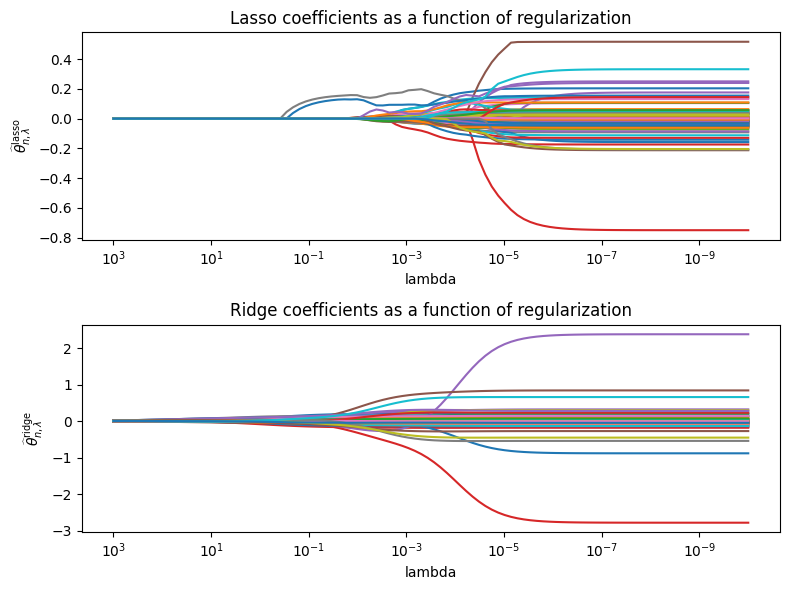

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

ax1.plot(alphas, coefs)
ax1.set_xscale("log")
ax1.set_xlim(ax1.get_xlim()[::-1])  # reverse axis
ax1.set_xlabel("lambda")
ax1.set_ylabel(r'$\widehat\theta^{\mathrm{lasso}}_{n,\lambda}$')
ax1.set_title("Lasso coefficients as a function of regularization")
ax1.axis("tight")

ax2.plot(alphas, coefs_ridge)
ax2.set_xscale("log")
ax2.set_xlim(ax2.get_xlim()[::-1])
ax2.set_xlabel("lambda")
ax2.set_ylabel(r'$\widehat\theta^{\mathrm{ridge}}_{n,\lambda}$')
ax2.set_title("Ridge coefficients as a function of regularization")
ax2.axis("tight")

plt.tight_layout()
plt.show()

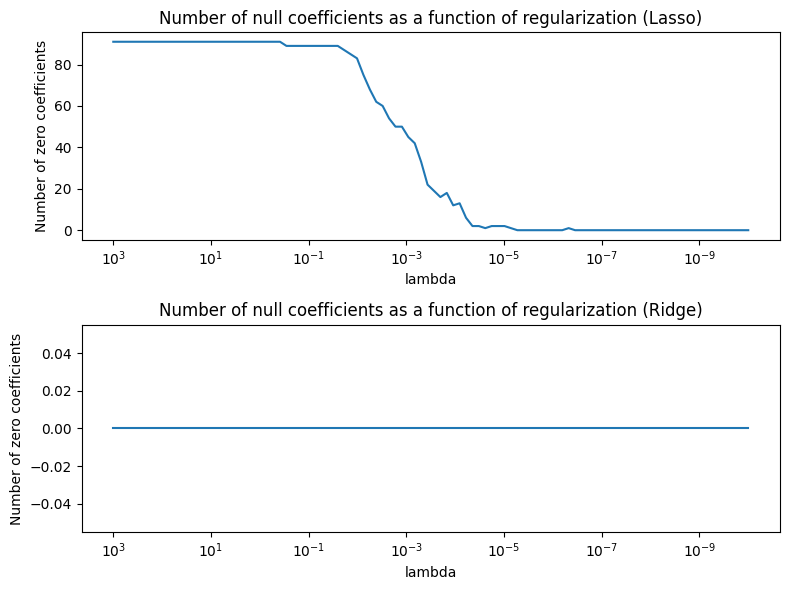

In [27]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

ax1.plot(alphas, nb_zeros)
ax1.set_xscale("log")
ax1.set_xlim(ax1.get_xlim()[::-1])  
ax1.set_xlabel("lambda")
ax1.set_ylabel('Number of zero coefficients')
ax1.set_title("Number of null coefficients as a function of regularization (Lasso)")
ax1.axis("tight")

ax2.plot(alphas, nb_zeros_ridge)
ax2.set_xscale("log")
ax2.set_xlim(ax2.get_xlim()[::-1])
ax2.set_xlabel("lambda")
ax2.set_ylabel('Number of zero coefficients')
ax2.set_title("Number of null coefficients as a function of regularization (Ridge)")
ax2.axis("tight")

plt.tight_layout()
plt.show()

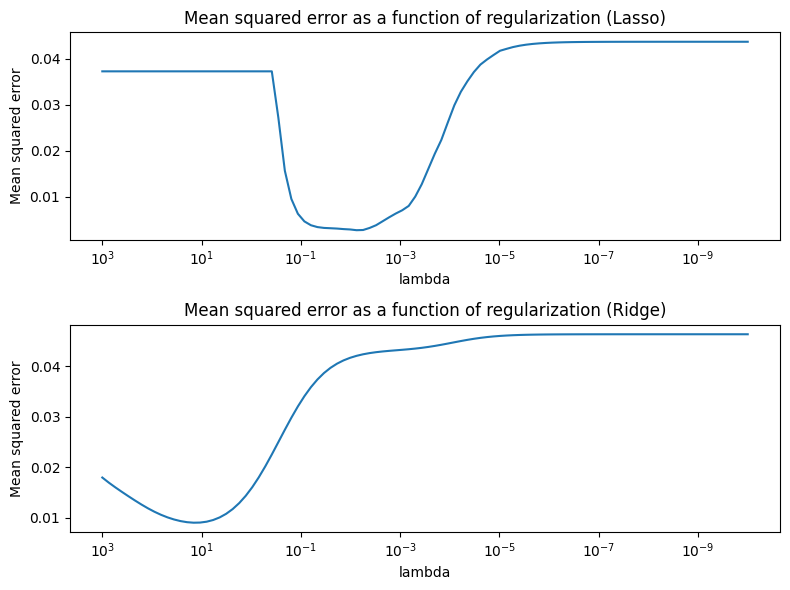

In [28]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

ax1.plot(alphas, rmse)
ax1.set_xscale("log")
ax1.set_xlim(ax1.get_xlim()[::-1])  # reverse axis
ax1.set_xlabel("lambda")
ax1.set_ylabel('Mean squared error')
ax1.set_title("Mean squared error as a function of regularization (Lasso)")
ax1.axis("tight")

ax2.plot(alphas, rmse_ridge)
ax2.set_xscale("log")
ax2.set_xlim(ax2.get_xlim()[::-1])
ax2.set_xlabel("lambda")
ax2.set_ylabel('Mean squared error')
ax2.set_title("Mean squared error as a function of regularization (Ridge)")
ax2.axis("tight")

plt.tight_layout()
plt.show()